In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.preprocessing import MinMaxScaler,LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [3]:
data=pd.read_csv("C:\\Users\\Dell Latitude 3410\\Downloads\\IRIS.csv")

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Pre-processing the Data

In [6]:
data_sample = data.sample(10)
data_sample.head()

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,Iris-virginica
15,5.7,4.4,1.5,0.4,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


In [7]:
data.shape

(150, 5)

In [8]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [11]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
data['species'].nunique()

3

In [13]:
Species = data['species'].value_counts().reset_index()
Species

,species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


In [14]:
data.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [15]:
type(data)

pandas.core.frame.DataFrame

In [16]:
data.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
data.sort_values('species',ascending = False)[1:6]

,sepal_length,sepal_width,petal_length,petal_width,species
111,6.4,2.7,5.3,1.9,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica


In [19]:
data[110:120]

,sepal_length,sepal_width,petal_length,petal_width,species
110,6.5,3.2,5.1,2.0,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica
113,5.7,2.5,5.0,2.0,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
116,6.5,3.0,5.5,1.8,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica


# Visualization

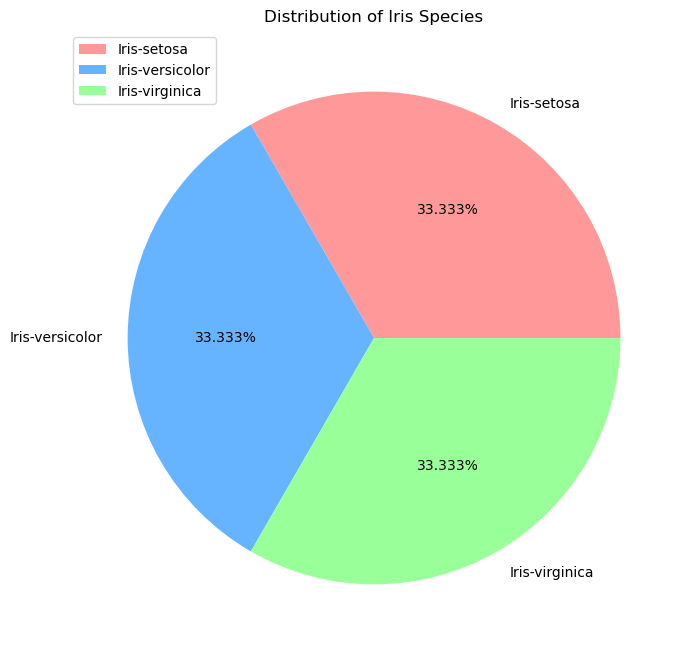

In [20]:
plt.figure(figsize=(8, 8))
colors = ['#ff9999','#66b3ff','#99ff99']  # Define the colors you want to use
plt.pie(Species['count'], labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], autopct='%1.3f%%', explode=[0, 0, 0], colors=colors)
plt.legend(loc='upper left')
plt.title("Distribution of Iris Species")
plt.show()


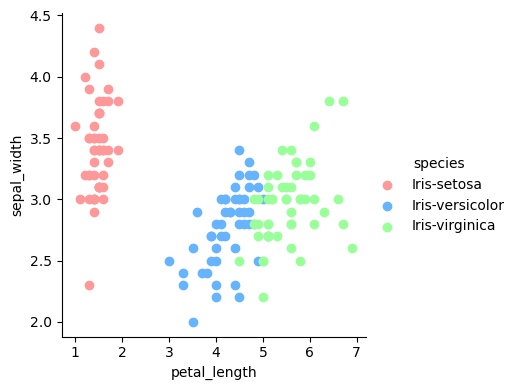

In [21]:
# Define the custom colors for each species
palette = {'Iris-setosa': '#ff9999', 'Iris-versicolor': '#66b3ff', 'Iris-virginica': '#99ff99'}

# Create the scatter plot using FacetGrid
sns.FacetGrid(data, hue='species', height=4, palette=palette) \
    .map(plt.scatter, "petal_length", "sepal_width") \
    .add_legend()

# Show the plot
plt.show()


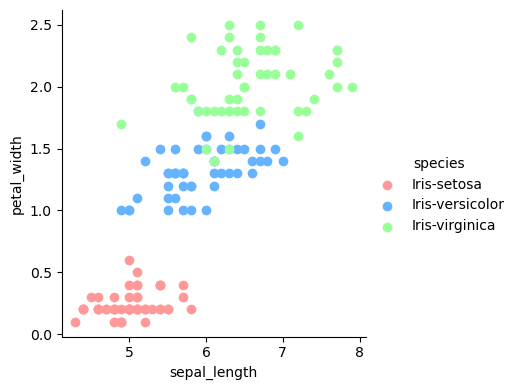

In [22]:
palette = {'Iris-setosa': '#ff9999', 'Iris-versicolor': '#66b3ff', 'Iris-virginica': '#99ff99'}
sns.FacetGrid(data, hue='species', height=4, palette=palette) \
    .map(plt.scatter, "sepal_length", "petal_width") \
    .add_legend()
plt.show()

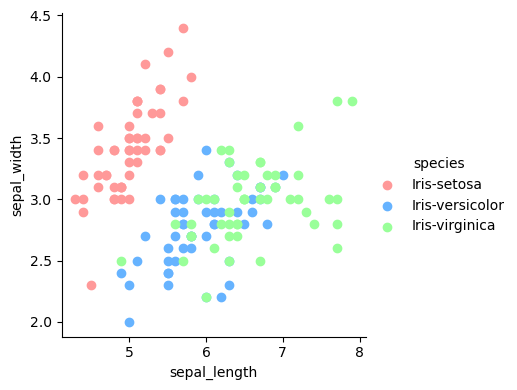

In [23]:
palette = {'Iris-setosa': '#ff9999', 'Iris-versicolor': '#66b3ff', 'Iris-virginica': '#99ff99'}
sns.FacetGrid(data, hue='species', height=4, palette=palette) \
    .map(plt.scatter, "sepal_length", "sepal_width") \
    .add_legend()
plt.show()

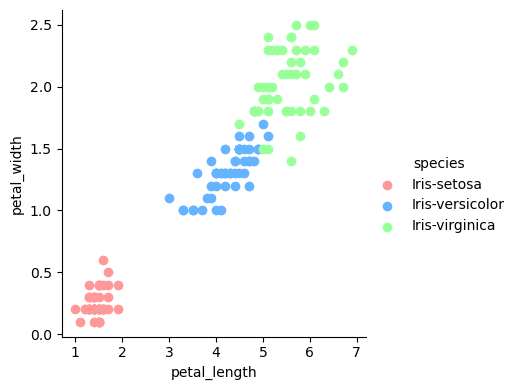

In [24]:
palette = {'Iris-setosa': '#ff9999', 'Iris-versicolor': '#66b3ff', 'Iris-virginica': '#99ff99'}
sns.FacetGrid(data, hue='species', height=4, palette=palette) \
    .map(plt.scatter, "petal_length", "petal_width") \
    .add_legend()
plt.show()

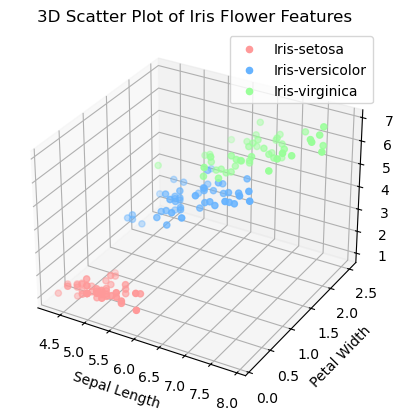

In [25]:
# Define colors for each species
colors = {'Iris-setosa': '#ff9999', 'Iris-versicolor': '#66b3ff', 'Iris-virginica': '#99ff99'}

# Create a 3D scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot each species separately
for species, color in colors.items():
    species_data = data[data['species'] == species]
    ax.scatter3D(species_data['sepal_length'], species_data['petal_width'], species_data['petal_length'], c=color, label=species)

# Set labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Flower Features')

# Add legend
ax.legend()

plt.show()

# Statistical Analysis

In [26]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column
iris_df['target'] = iris.target


In [28]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

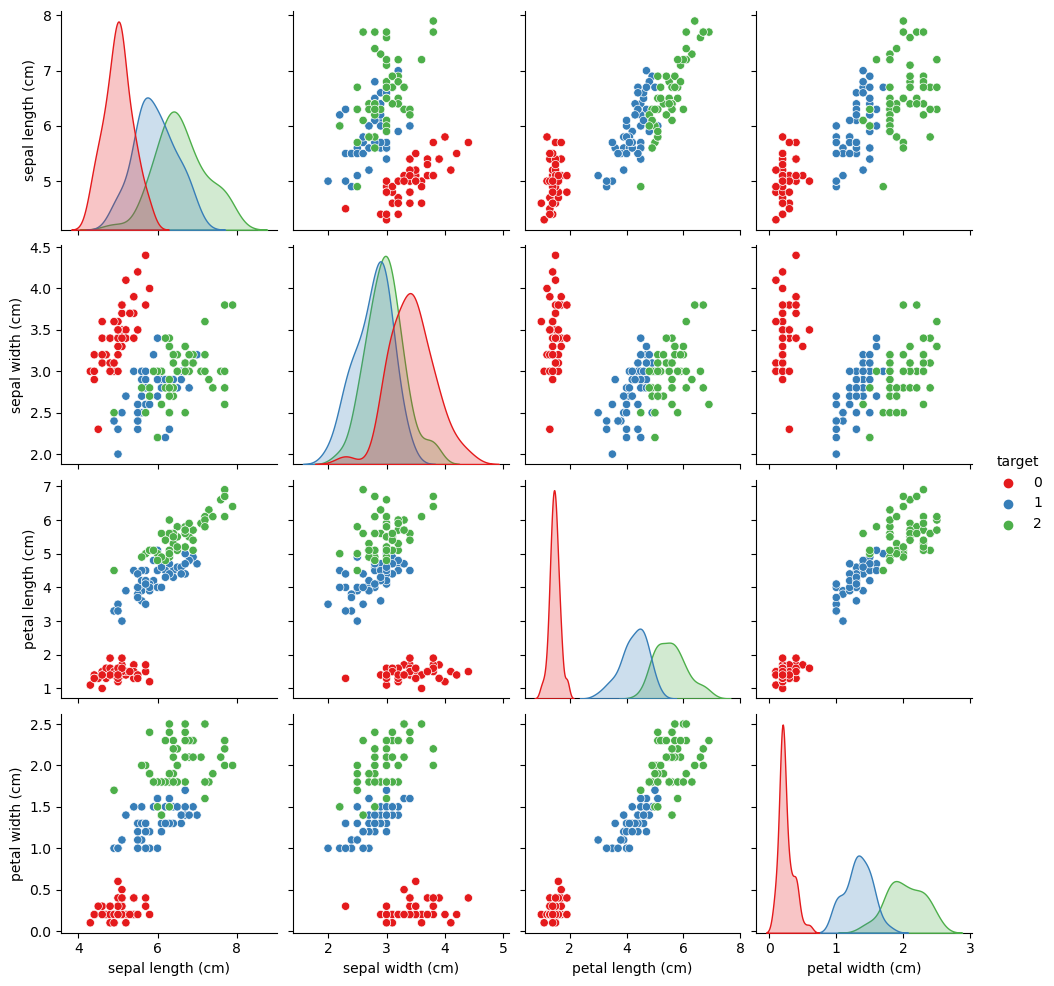

In [29]:
# Pair Plot
sns.pairplot(iris_df, hue='target', palette='Set1')
plt.show()

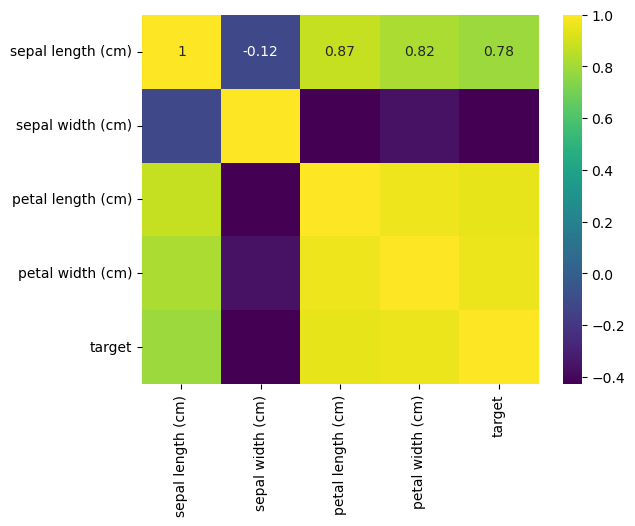

In [30]:
# Correlation Matrix
corr_matrix = iris_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.show()

In [31]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris.data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['target'] = iris.target

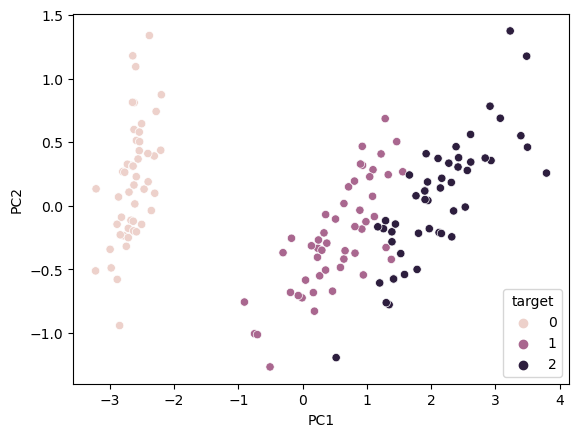

In [32]:
# Scatter Plot of PCA Result
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, markers=["o", "s", "D"])
plt.show()

In [33]:
X = data.drop('species', axis =1)
y = data['species']

In [34]:
X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [36]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [37]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Train-Test Splitting

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# Model Training


In [39]:
def evaluate(model, X_train, y_train, X_test, y_test):  
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print('Model:', model)
    print('Accuracy:', accuracy)

# K Neighbors Classifier

In [40]:
model_1_KNN = KNeighborsClassifier()

In [41]:
k_range = np.arange(1, 20, 2)
scores = [] # To store cross-validation scores for each k

In [42]:
for k in k_range:
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model_KNN, X_train, y_train, cv=3, n_jobs=-1)
    scores.append(score.mean())

In [43]:
# Storing the mean squared error to decide the optimum k
mse = [1 - x for x in scores]


In [44]:
print("Scores for each k:", scores)
print("Mean Squared Errors for each k:", mse)

Scores for each k: [0.9333333333333332, 0.9428571428571427, 0.9523809523809522, 0.9523809523809524, 0.9619047619047619, 0.9523809523809524, 0.9333333333333332, 0.9333333333333332, 0.9238095238095237, 0.9238095238095237]
Mean Squared Errors for each k: [0.06666666666666676, 0.05714285714285727, 0.04761904761904778, 0.04761904761904756, 0.03809523809523807, 0.04761904761904756, 0.06666666666666676, 0.06666666666666676, 0.07619047619047625, 0.07619047619047625]


In [45]:
plt.figure(figsize=(20,8))

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

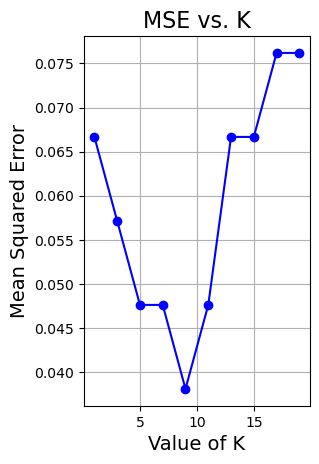

In [46]:
# Plotting Mean Squared Error
plt.subplot(121)
plt.plot(k_range, mse, marker='o', linestyle='-', color='b')
plt.xlabel("Value of K", fontsize=14)
plt.ylabel("Mean Squared Error", fontsize=14)
plt.title("MSE vs. K", fontsize=16)
plt.grid(True)


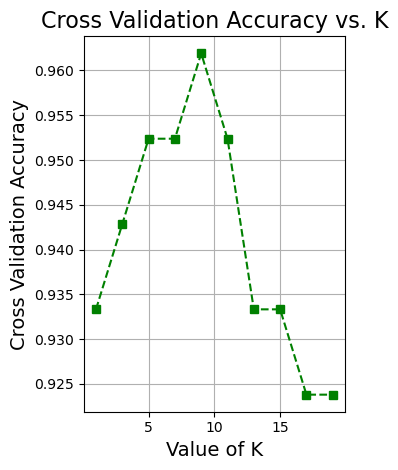

In [47]:
# Plotting Cross-Validation Accuracy
plt.subplot(122)
plt.plot(k_range, scores, marker='s', linestyle='--', color='g')
plt.xlabel("Value of K", fontsize=14)
plt.ylabel("Cross Validation Accuracy", fontsize=14)
plt.title("Cross Validation Accuracy vs. K", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

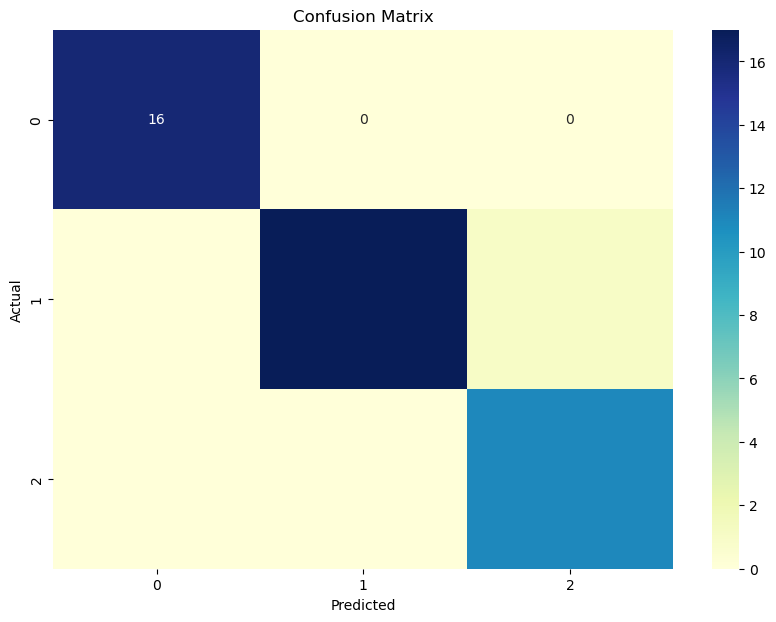

Model: KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.9777777777777777


In [48]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_clf = knn.fit(X_train, y_train)
evaluate(knn_clf,X_train, y_train, X_test, y_test)

In [50]:
model_1_KNN.fit(X_train, y_train)
predictions = model_1_KNN.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

In [51]:
print(conf_matrix)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [54]:
acc1=accuracy_score(y_test,predictions)
print(acc1)

0.9777777777777777


In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Logistic Regression

In [62]:
def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test) 
  accuracy = accuracy_score(pre,y_test)
  sns.heatmap(confusion_matrix(pre,y_test),annot=True,cmap='Pastel1')
  print(model)
  print('Accuracy : ',accuracy)

In [63]:
model_2_LR = LogisticRegression()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=1000.0, random_state=42)
Accuracy :  0.9777777777777777


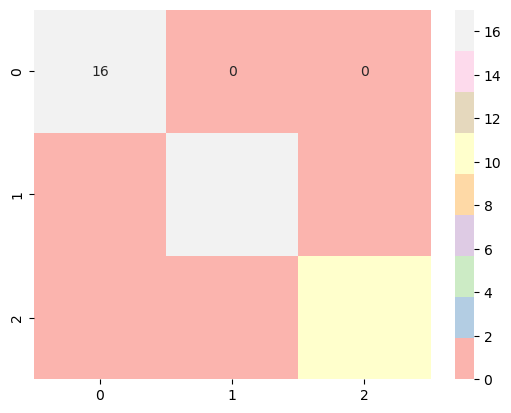

In [64]:
lsr_best = LogisticRegression(penalty='l2',C=1000.0,random_state = 42)
lsr_clf = lsr_best.fit(X_train,y_train)
evaluate(lsr_clf)

In [65]:
model_2_LR.fit(X_train,y_train)
model_2_LR.score(X_train, y_train)

0.9809523809523809

In [66]:
pred = model_2_LR.predict(X_test)

In [67]:
accuracy_score(y_test,pred)

0.9777777777777777

In [68]:
y_pred = model_2_LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix is : ")
print(cm)

The Confusion Matrix is : 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [69]:
acc2=accuracy_score(y_test, y_pred)
print(acc2)

0.9777777777777777


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Random Forest Classifier

In [71]:
model_3_RFC = RandomForestClassifier()

RandomForestClassifier(max_depth=9, n_estimators=50)
Accuracy :  0.9777777777777777


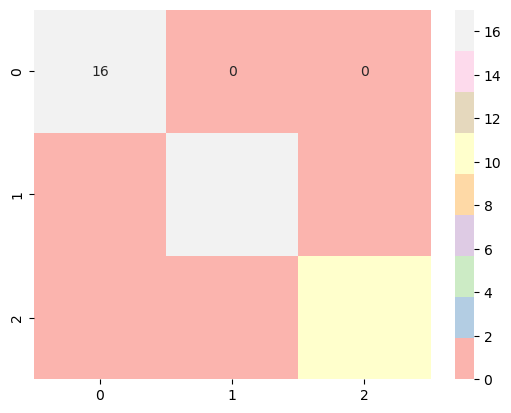

In [73]:
rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)
evaluate(RFC_clf)

In [74]:
model_3_RFC.fit(X_train, y_train)
predictions = model_3_RFC.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

In [75]:
print(conf_matrix)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [76]:
acc3=accuracy_score(y_test, y_pred)
print(acc3)

0.9777777777777777


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [79]:
print("The Acuuracy of Logistic Regression Classifier is ",acc1)
print("The Acuuracy of K Nearest Neighbors Classifier is ",acc2)
print("The Acuuracy of Random Forest Classifier is ",acc3)

The Acuuracy of Logistic Regression Classifier is  0.9777777777777777
The Acuuracy of K Nearest Neighbors Classifier is  0.9777777777777777
The Acuuracy of Random Forest Classifier is  0.9777777777777777
